In [2]:
import pandas as pd 
import numpy as np 
import xgboost
import os
import time
import warnings
import sklearn
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt 
import datetime
%matplotlib inline
warnings.filterwarnings('ignore')
file=r'c:/users/lance/desktop/GitHub_project/tianchi_power_data/matrix_0.csv'
weatherfile=r'c:/users/lance/desktop/GitHub_project/tianchi_power_data/weather_data_2014-1-1~2016~9-30.xlsx'

c:\users\lance\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\lance\appdata\local\programs\python\python35\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
data=pd.read_csv(file)
weatherdata=pd.read_excel(weatherfile)
k=['timestamp']
k+=[str(x) for x in range(1,1455)]
k.append('sum')
data.columns=k
data['timestamp']=pd.DataFrame(pd.to_datetime(data['timestamp']))

In [41]:
data['dayofweek']=data['timestamp'].apply(lambda x:x.dayofweek)
data['dayofyear']=data['timestamp'].apply(lambda x:x.dayofyear)
data['is_weekend']=data['timestamp'].apply(lambda x:1 if x.dayofweek in range(5,7) else 0)

In [77]:
#data['num_producting']=
def get_num_producting(df,x):
    counter=0
    for i in range(1,1455):
        if df.loc[x,str(i)]!=1:
            counter+=1
    return counter

In [81]:
pd.DataFrame(data.loc[0,]).T

,timestamp,1,2,3,4,5,6,7,8,9,...,1449,1450,1451,1452,1453,1454,sum,dayofweek,dayofyear,is_weekend
0,2015-01-01 00:00:00,1135,24,385,206,156,52,167,621,59,...,75,277,2225,3511,191,976,2900575,3,1,0


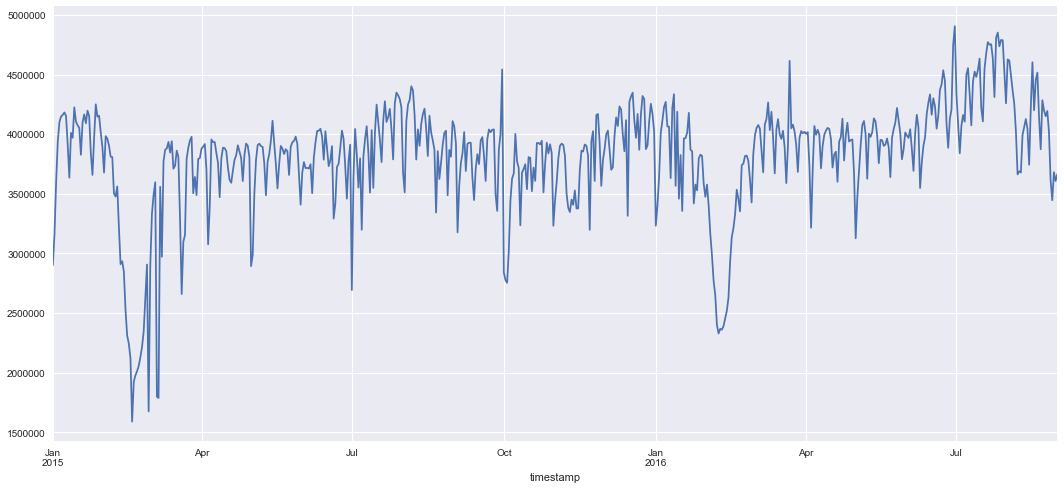

In [74]:

data.set_index('timestamp')['sum'].plot(figsize=[18,8])